# Count Genre

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the count of each genre present in IMDB movie dataset?
Print the Genre and number of movies present in that genre.
Note: Ignore the empty value present in genre.

In [21]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()

imdb = pd.read_sql_query('select * from imdb', db)
genre = pd.read_sql_query('select * from genre', db)
earning = pd.read_sql_query('select * from earning', db)

genre_name = genre['genre'].value_counts().index
genre_count = genre['genre'].value_counts().values

for i in range(len(genre_name)):
    if genre_name[i] == '':
        continue
    print(genre_name[i],genre_count[i])

Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Romance 13
Animation 13
Crime 11
Mystery 7
Fantasy 7
History 6
Family 3
Sport 3
Music 3
Western 2
War 2
Horror 2
Musical 1


# IMDB Movie
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.

In [51]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()

imdb = pd.read_sql_query('select * from imdb', db)
genre = pd.read_sql_query('select * from genre', db)
earning = pd.read_sql_query('select * from earning', db)

earning['Total'] = earning['Domestic'] + earning['Worldwide']
index = earning['Total'].idxmax()
# earning
movie_id = earning['Movie_id'][index]
print(imdb[imdb.Movie_id == movie_id]['Rating'].values[0])

8.1


# IMDB Voted
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.

In [55]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()

imdb = pd.read_sql_query('select * from imdb', db)
genre = pd.read_sql_query('select * from genre', db)
earning = pd.read_sql_query('select * from earning', db)

index = imdb['TotalVotes'].idxmax()
print(imdb['Title'][index],imdb['Rating'][index])

Inception (2010) 8.8


# IMDB Running Time
Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.


In [122]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()

imdb = pd.read_sql_query('select * from imdb', db)
genre = pd.read_sql_query('select * from genre', db)
earning = pd.read_sql_query('select * from earning', db)
imdb['Runtime'].dropna(inplace=True)
imdb['Runtime'][imdb.Runtime == ''] = '0 min'
imdb['Runtime'] = imdb['Runtime'].apply(lambda x: str(x).split(" ")[0])
imdb['Runtime'] = pd.to_numeric(imdb['Runtime'])
index = imdb['Runtime'].idxmax()
print(imdb['Title'][index],imdb['Runtime'][index])

The Wolf of Wall Street (2013) 180


# IMDB Profit
Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [98]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()

imdb = pd.read_sql_query('select * from imdb', db)
genre = pd.read_sql_query('select * from genre', db)
earning = pd.read_sql_query('select * from earning', db)

imdb_earning = pd.merge(imdb,earning,on='Movie_id')
imdb_earning['Domestic'].replace('',0,inplace=True)
imdb_earning['Worldwide'].replace('',0,inplace=True)
imdb_earning['Budget'].replace('',0,inplace=True)
imdb_earning['Profit'] = imdb_earning['Domestic'] + imdb_earning['Worldwide'] - imdb_earning['Budget']
index = imdb_earning['Profit'].idxmax()
print(imdb_earning['Title'][index])

Star Wars: The Force Awakens (2015)


# IMDB Least Budget
Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [135]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()

imdb = pd.read_sql_query('select * from imdb', db)
genre = pd.read_sql_query('select * from genre', db)
earning = pd.read_sql_query('select * from earning', db)

imdb_earning = pd.merge(imdb,earning,on='Movie_id')
imdb_earning['Domestic'].replace('',0,inplace=True)
imdb_earning['Worldwide'].replace('',0,inplace=True)
imdb_earning = imdb_earning[imdb_earning['Budget'] != '']
imdb_earning['Budget'].dropna(inplace=True)
imdb_earning['Profit'] = imdb_earning['Domestic'] + imdb_earning['Worldwide'] - imdb_earning['Budget']
imdb_earning = imdb_earning[imdb_earning['Budget'] == imdb_earning['Budget'].min()]
imdb_earning['Profit'] = pd.to_numeric(imdb_earning['Profit'])
index = imdb_earning['Profit'].idxmax()
print(imdb_earning['Title'][index])

Short Term 12 (2013)


# IMDB Year Top

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.

In [163]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

imdb = pd.read_sql_query('select * from imdb', db)
genre = pd.read_sql_query('select * from genre', db)
earning = pd.read_sql_query('select * from earning', db)

#Can Fetch Year from Title

imdb_earning = pd.merge(imdb,earning,on='Movie_id')
imdb_earning['TotalEarning'] = imdb_earning['Domestic'] + imdb_earning['Worldwide']
imdb_earning['Year'] = imdb_earning['Title'].apply(lambda x: str(x).split("(")[-1][:-1])

year = imdb_earning.groupby("Year")["TotalEarning"].idxmax().index
index = imdb_earning.groupby("Year")["TotalEarning"].idxmax().values

for i in range(len(year)):
    print(year[i],imdb_earning['Title'][index[i]])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


## IMDB Genre Budget

Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

Biography 2.59
Drama 10.85
History 0.72
Adventure 25.10
Comedy 7.22
Romance 1.12
Fantasy 4.54
Action 17.98
Mystery 1.95
Sci-Fi 10.77
Animation 7.66
Thriller 3.99
Sport 0.46
Western 0.57
Crime 1.77
War 0.36
Family 1.91
Music 0.15
Musical 0.25
Horror 0.03


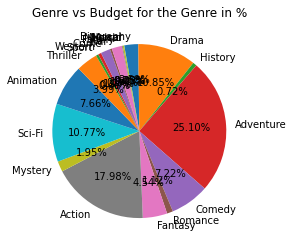

In [210]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()

imdb = pd.read_sql_query('select * from imdb', db)
genre = pd.read_sql_query('select * from genre', db)
earning = pd.read_sql_query('select * from earning', db)

imdb_genre = pd.merge(imdb,genre,on="Movie_id")
imdb_genre['Budget'].replace('',0,inplace=True)
imdb_genre = imdb_genre[imdb_genre['genre'] != '']

output = {}
totalbudget = imdb_genre['Budget'].sum()

labels = imdb_genre['genre'].unique()
sizes = []

for row in imdb_genre.iterrows():
    genre = row[1]['genre']
    if genre in output:
        output[genre] += row[1]['Budget']
    else:
        output[genre] = row[1]['Budget']
for i in output:
    sizes.append(output[i])
    print(i,"{:.2f}".format(output[i]*100/totalbudget))
    
plt.title('Genre vs Budget for the Genre in %')
plt.pie(sizes,labels=labels,autopct="%.2f%%",counterclock=False,startangle=100)
# plt.axis("equal")
plt.show()